In [6]:
# Imports
import PySimpleGUI as sg
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import os
import scipy
import numpy as np

/var/folders/vl/h_05p4l17bjbvfhgqzccm8dw0000gn/T/ipykernel_38374/798496696.py:17: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  fig, ax = plt.subplots(figsize=(8, 6))


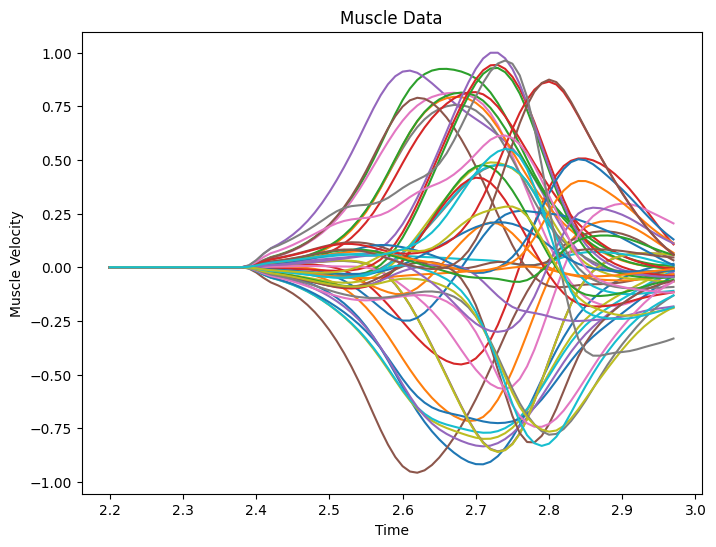

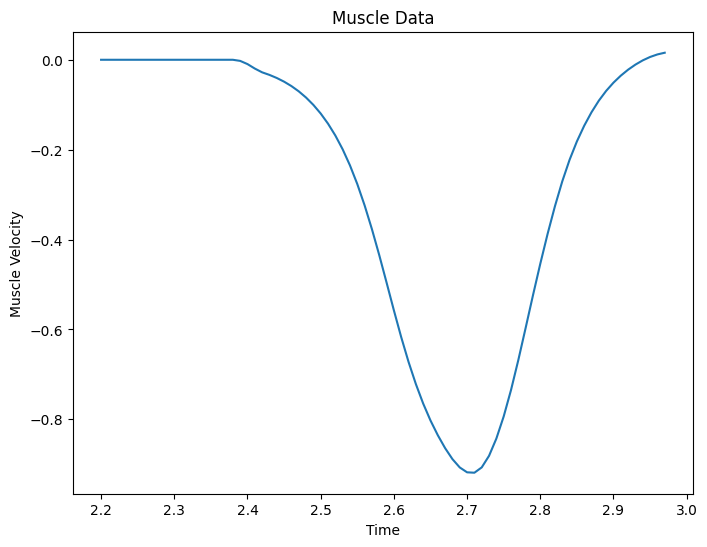

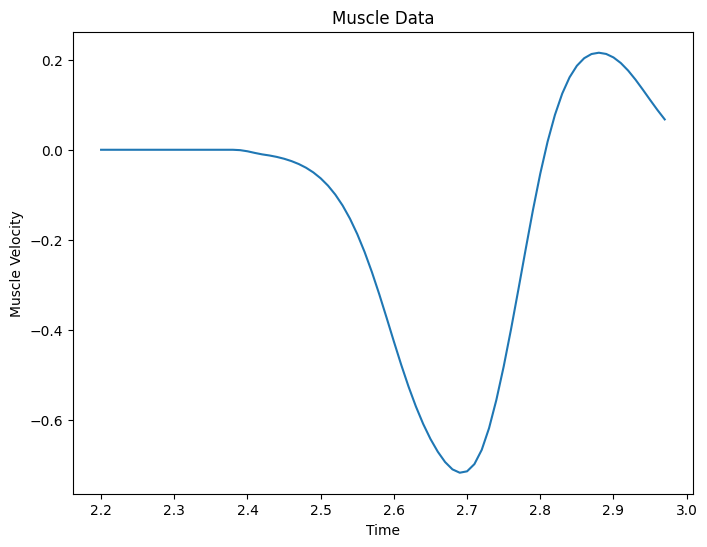

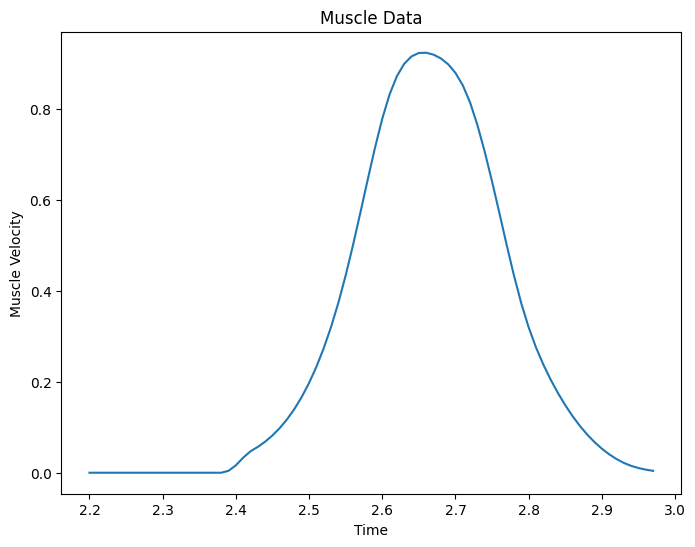

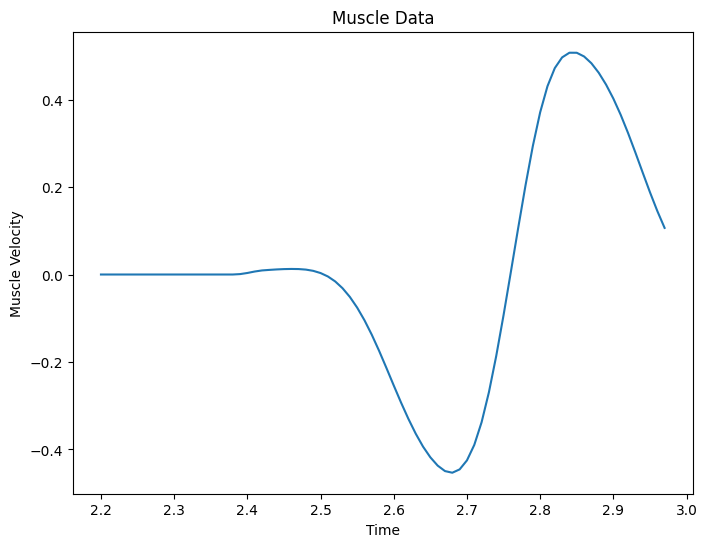

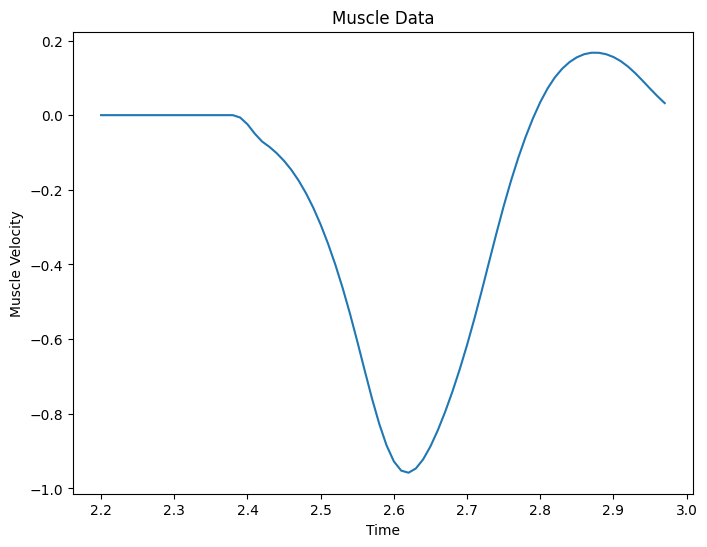

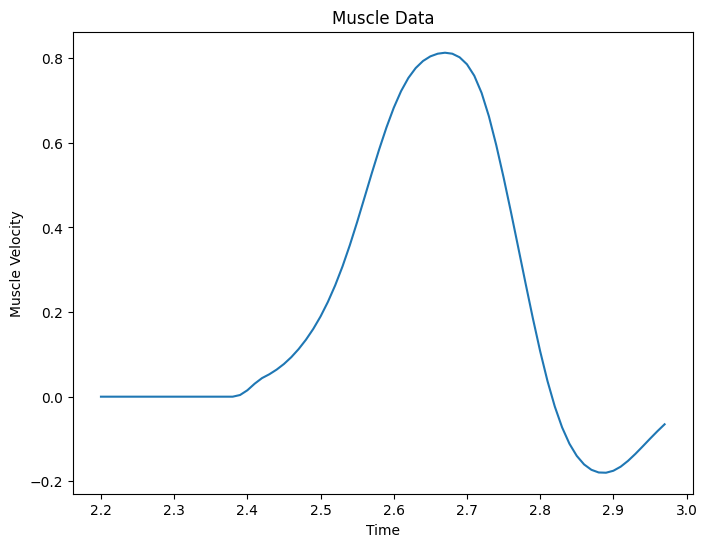

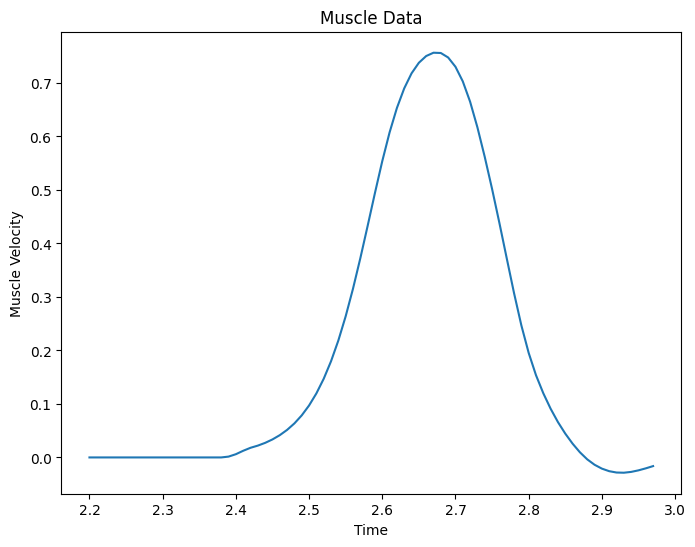

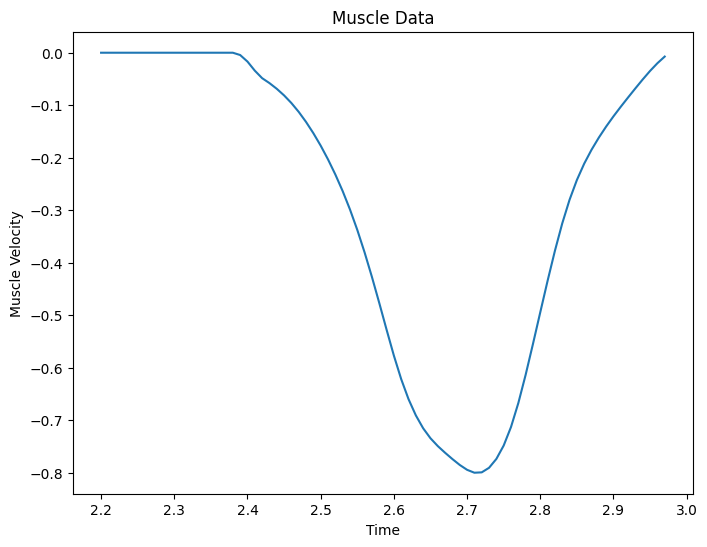

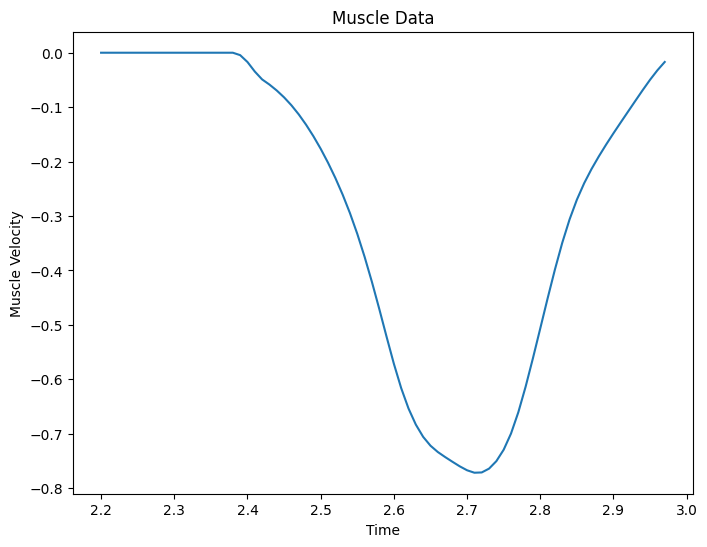

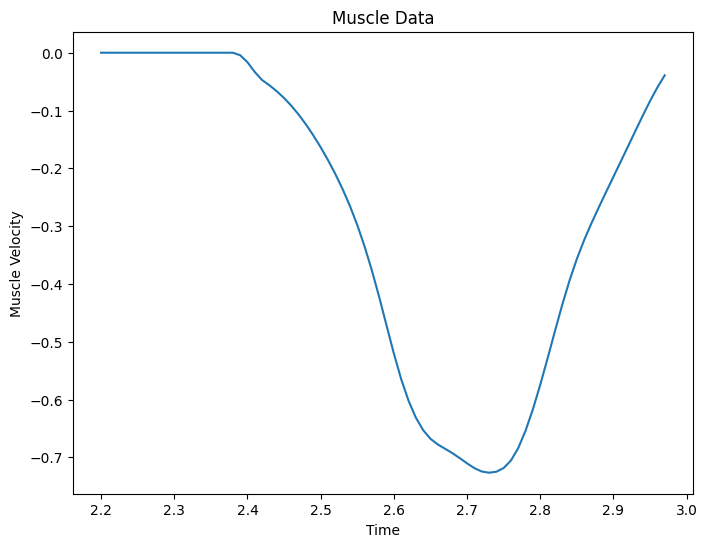

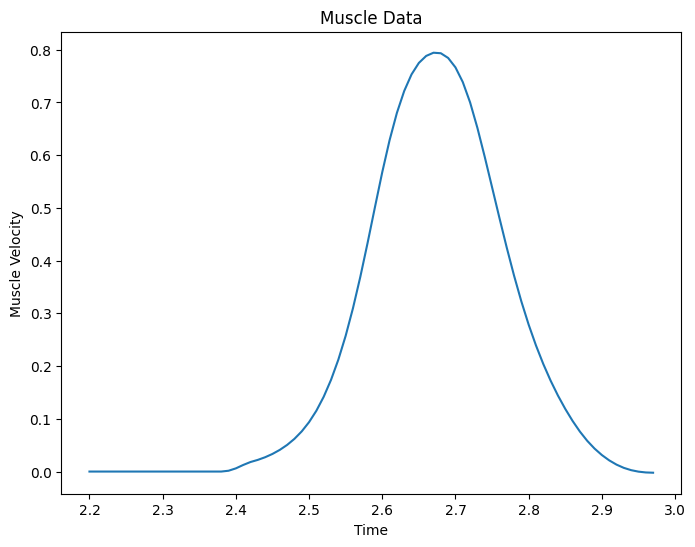

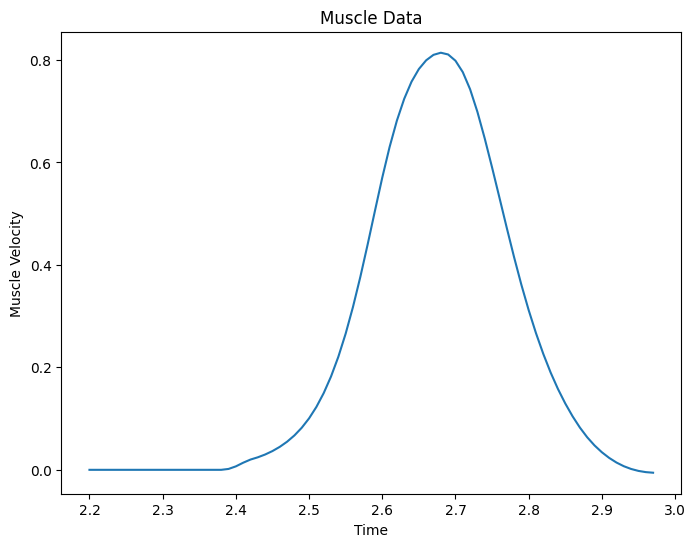

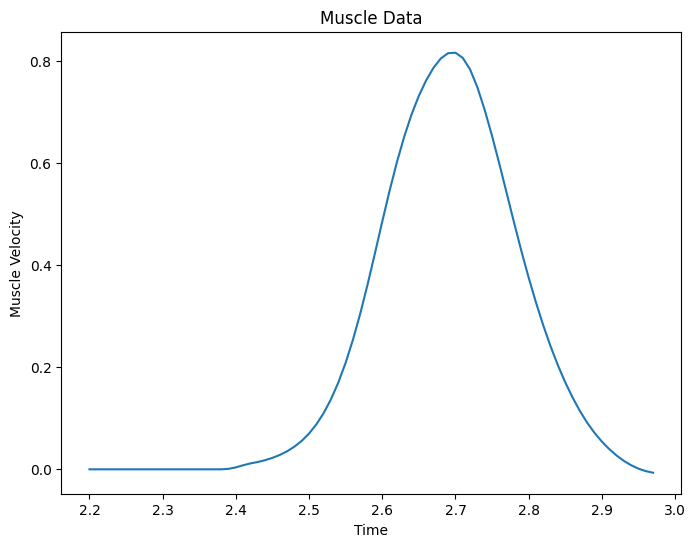

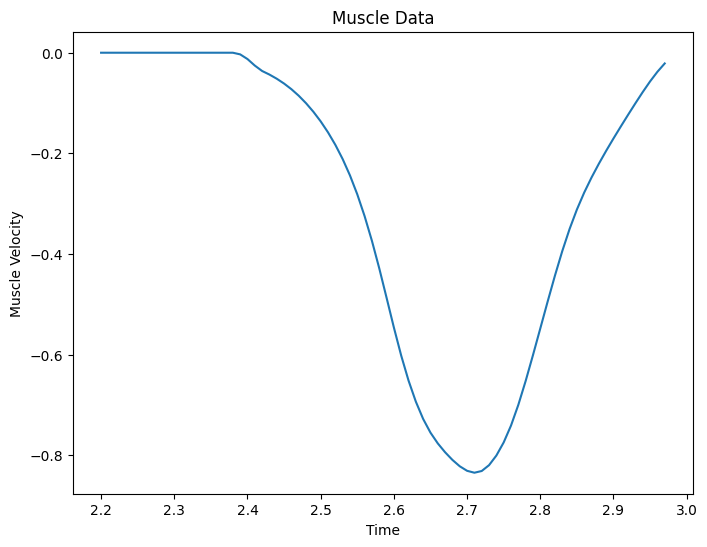

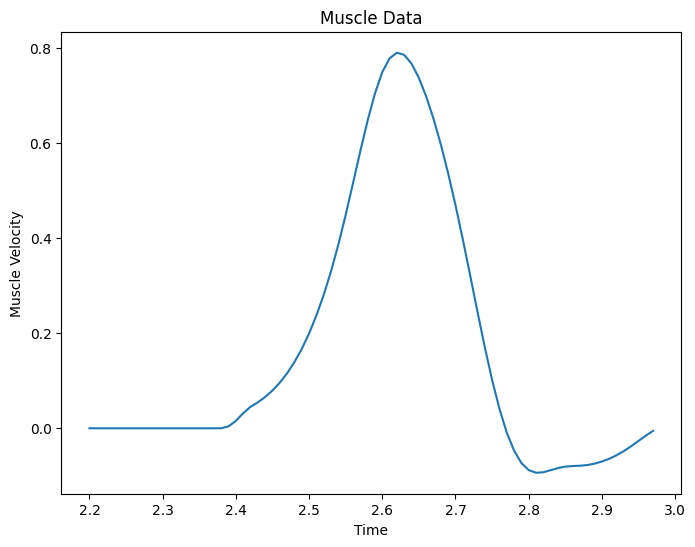

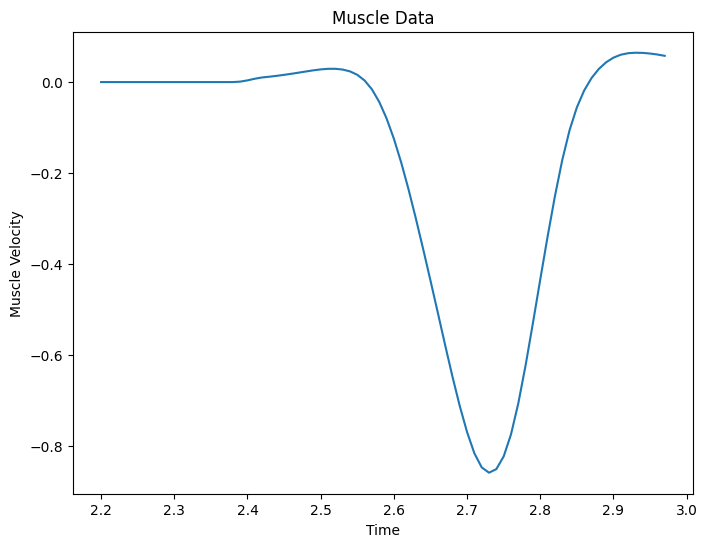

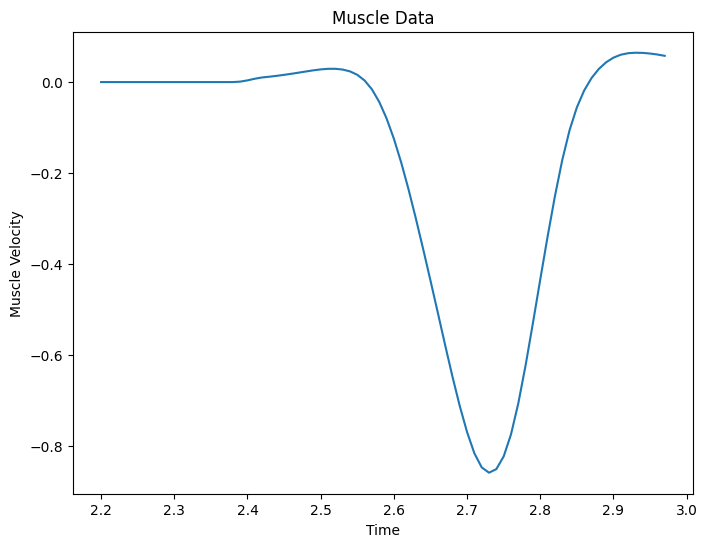

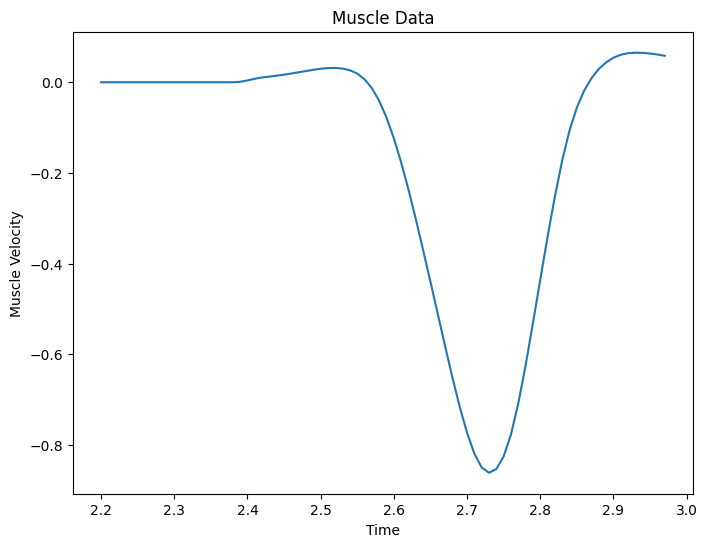

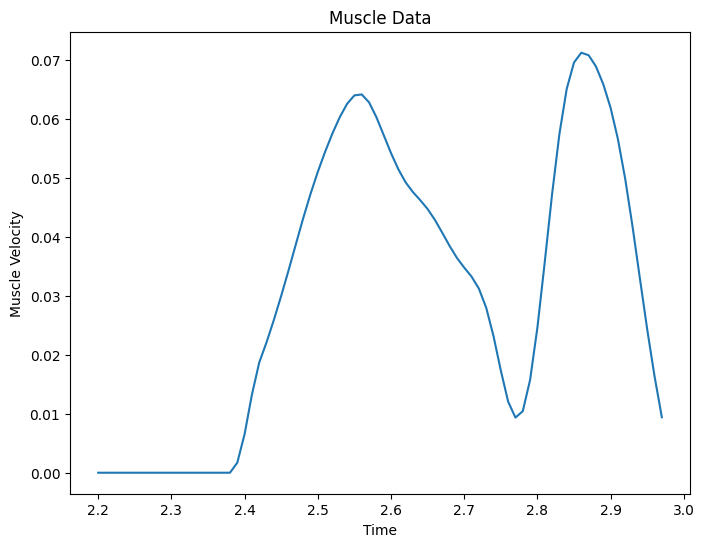

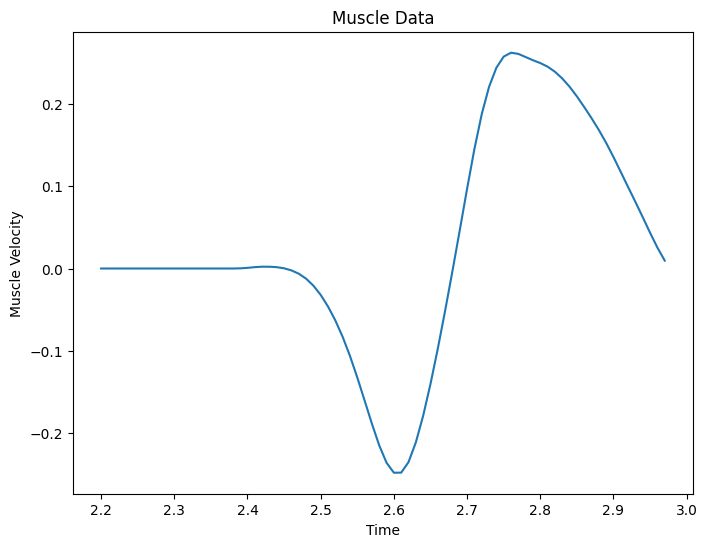

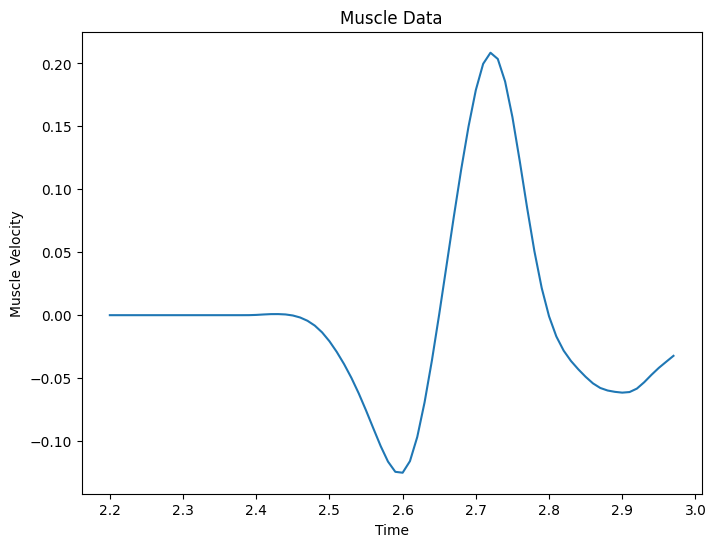

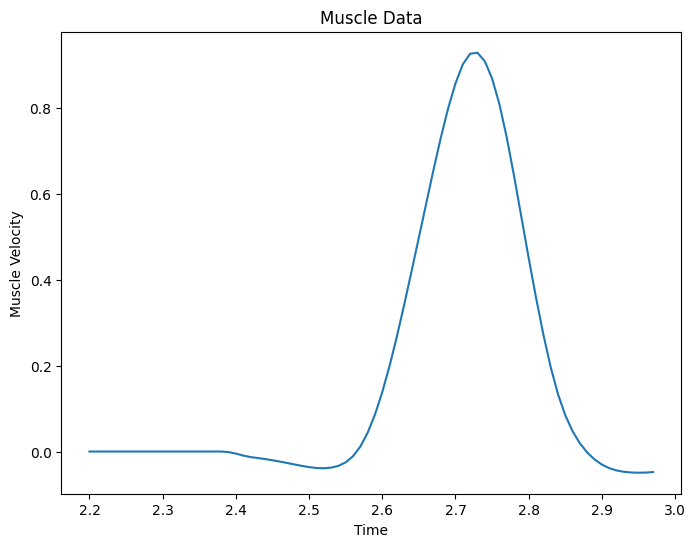

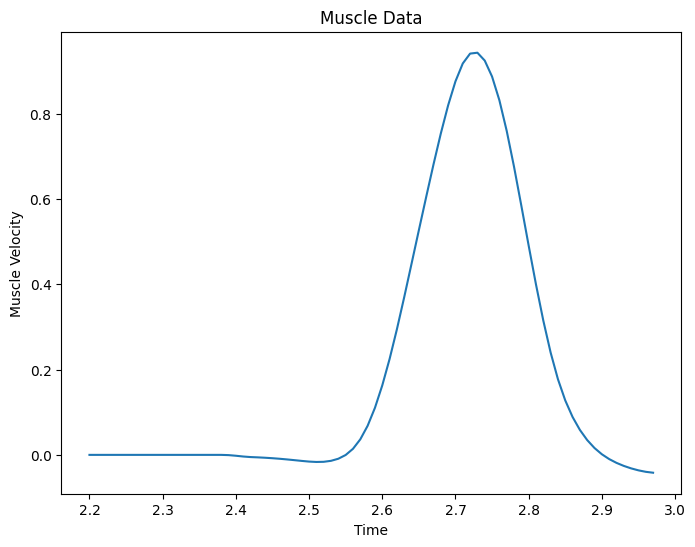

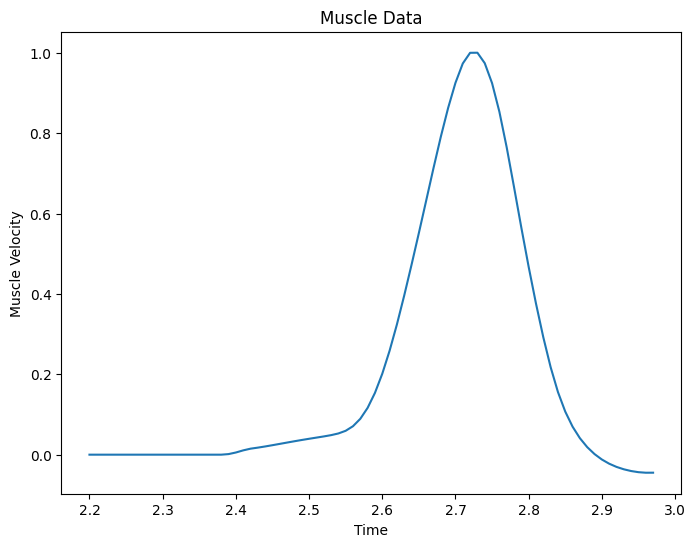

In [7]:

# Sample DataFrame
df = pd.DataFrame(data=[[i]*50 for i in range(298)])

# Get monkey data using relative path of gui file
current_directory = os.getcwd()
parent_directory = os.path.dirname(current_directory)
file_path = os.path.join(parent_directory, "model", "monkey_data.mat")

# Load the .mat file
mat_data = scipy.io.loadmat(file_path)
mvm_data = mat_data['targ'][0][0]
time_axis = np.arange(2.2, 2.98, .01)

# Function to plot data
def plot_data(data):
    data = data[220:]
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.plot(time_axis, data)
    ax.set_xlabel('Time')
    ax.set_ylabel('Muscle Velocity')
    ax.set_title('Muscle Data')
    return fig

# Define the layout of the GUI
left_column = [
    [sg.Button("All 50 Muscles")],
    [sg.Button("Single Muscle")], 
]

right_column = [
    [sg.Canvas(size=(640, 480), key='-CANVAS-')],
    [sg.Slider(range=(0, 50), orientation='h', size=(100, 20), default_value=0, key='-SLIDER-', enable_events = True)],
]

layout = [ [[sg.Text("Neuro Engineering Capstone", font='Any 20 bold')]],
    [sg.Column(left_column), sg.VSeperator(), sg.Column(right_column)], 
]

# Create the GUI window
window = sg.Window('DataFrame Plotter', layout)

# Initialize canvas and fig
canvas_elem = window['-CANVAS-']
fig = None
canvas = None

# Event loop
while True:
    event, values = window.read()

    if event == sg.WINDOW_CLOSED or event == 'Exit':
        if fig is not None:
            plt.close(fig)  # Close the figure to prevent it from being printed
        break
        break
    elif event == 'All 50 Muscles':
        fig = plot_data(mvm_data.T)  # Plot all rows
    elif event == 'Single Muscle':
        fig = plot_data(mvm_data[int(values['-SLIDER-'])].T)  # Plot only the first row
    if event == '-SLIDER-':
        fig = plot_data(mvm_data[int(values['-SLIDER-'])].T)  # Plot only the first row
    # Update the plot in the GUI
    if fig is not None:
        if canvas:
            canvas.get_tk_widget().pack_forget()  # Remove the previous canvas
        canvas = FigureCanvasTkAgg(fig, canvas_elem.TKCanvas)
        canvas.draw()
        canvas.get_tk_widget().pack(side='top', fill='both', expand=1)

window.close()
